# Tutorial of "matplotlib.pyplot"

http://matplotlib.org/users/pyplot_tutorial.html

## Basics

`matplotlib.pyplot` is a collection of command style functions that make `matplotlib` work like *MATLAB*. Each function in it makes some change to a figure, like creates a figure, creates a plotting area, plots some lines, etc.

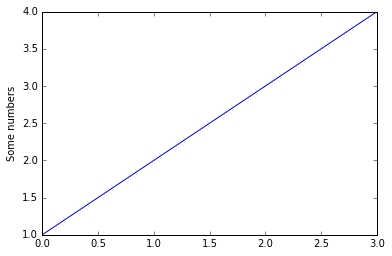

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1, 2, 3, 4])
plt.ylabel("Some numbers")
plt.show()

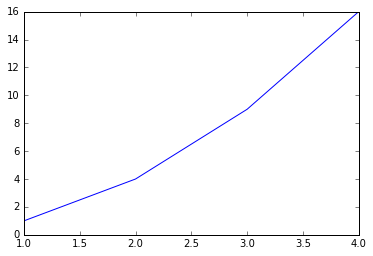

In [2]:
plt.plot([1,2,3,4], [1, 4, 9, 16])

For every x,y pari of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from `MATLAB`, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For instance, to plot the above plot with red circle, we have the code below. Note we also use `plt.axis([x_axis_min, x_axis_max, y_axis_min, y_axis-max])` to specify the axis range.

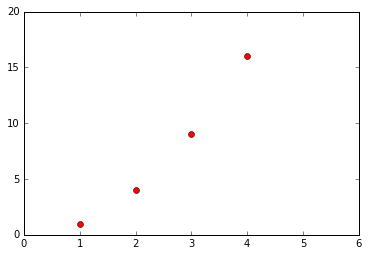

In [3]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

The full documentation of `plot()` can be found [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

Generally, we can also use `numpy` arrays for `plt` (in fact, ,all sequences are converted to numpy arrays internally). The example below illustrates a plotting several lines with different format styles in one command using arrays.

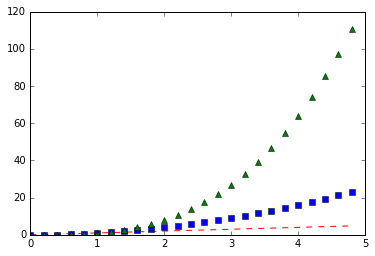

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# Red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Controlling Line Properties

There are many other attributes that we can set
- linewidth
- dash style
- antialiased
- etc

(full documentation can be found [here](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D))

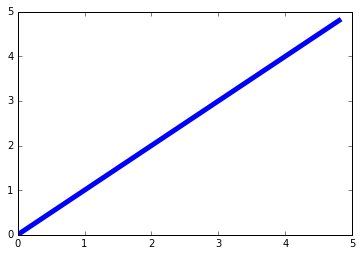

In [5]:
# use keyword args to set line properties
plt.plot(t, t, linewidth = 5.0)

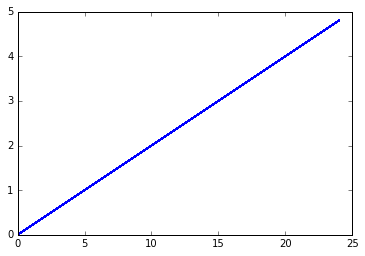

In [6]:
line, = plt.plot(t, '-')
line.set_antialiased(False)

We can also use `setp()` command to set plot attributes. The example below uses a *MATLAB* style command to set multiple properties on a list of lines, `setp()` works transparently with a list of objects or a single object. We can either use python keyword arguments or MATLAB-style string/value pairs.

[None, None, None, None]

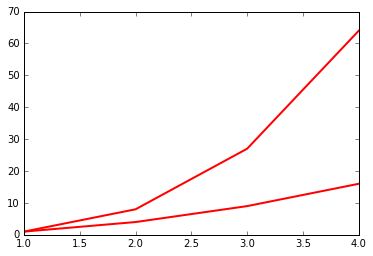

In [7]:
x1 = x2 = np.array([1, 2, 3, 4])
y1 = x1 ** 2
y2 = x2 ** 3

lines = plt.plot(x1, y1, x2, y2)

plt.setp(lines, color = 'r', linewidth = 2.0)

# the same to the command below
# plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

To get a list of settable line properties, we can call `setp()` function with a line or ines as argument.

In [8]:
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

## Working with Multiple Figures & Axes

MATLAB, and `pyplot`, have the concept of the **current figure** and the **current axes**. All plotting commands apply t the current axes. The function `gca()` returns the current axes, and `gcf()` returns the current figure. Normally we don't have to worry about this as it's all taken care of behind the scenes.

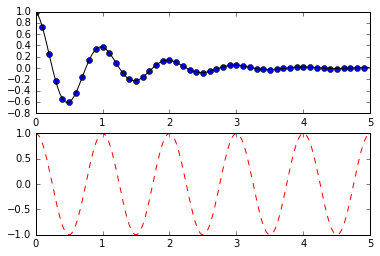

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `figure()` command here is OPTIONAL since `figure(1)` will be created by default, just as a `subplot(111)` will be created by default if we don't manually specify any axes. 

The `subplot()` command specifies *num_rows*, *num_cols*, *fig_num* where *fig_num* ranges from 1 to *num_rows* x *num_cols*. The commas in **`subplot`** command are optional if *num_rows* x *num_cols* < 10. So `subplot(211)` is identical to `subplot(2, 1, 1)`.

If you want to place an axes manually, i.e., not on a rectangular grid, use **`axes()`** command, which allows you to specify the location as `axes([left, bottom, width, height])` where all values are in fractional (0 to 1) coordinates.

We can also set the background color of an axes by using argument `axisbg` as below.

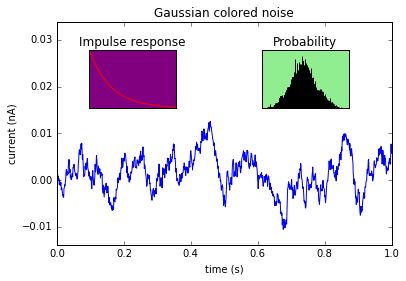

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([0.6, 0.6, 0.2, 0.2], axisbg='lightgreen')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, 0.2, 0.2], axisbg = "purple")
plt.plot(t[:len(r)], r, 'red')
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

You can create multiple figures by using multiple `figure()` calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as you want.

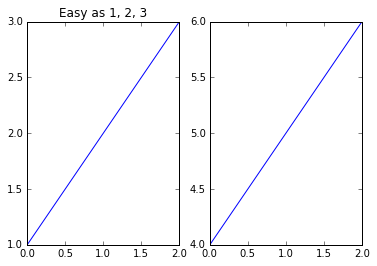

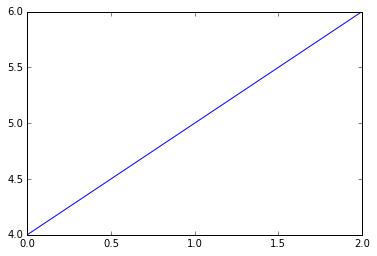

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(1, 2, 1)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(1, 2, 2)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default


plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(121)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

We can clear the current figure with `clf()` and the current axes with `cla()`.

If lots of figures are made, we need to **NOTE**: the memory required for a figure is not completely releaesed until the figure is explicityly closed with **`close()`**. Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the scrren, is **NOT** enough, because `pyplot` maintains internal references until `close()` is called.

## Working with Text

The `text()` command can be used to add text in an arbitrary location, and `xlabel()`, `ylabel()` and `title()` are used to add text in the indicated locations.

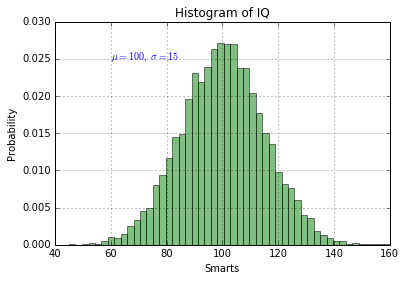

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(1)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='g', alpha=0.5) # 'alpha' is the transprancy


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, '$\mu=100,\ \sigma=15$', color = 'blue')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the `text()` commands return an `matplotlib.text.Text` instance. Just as with lines above, we can customize the properties by passing keyword arguments into the text function or using `setp()`.

```python
t = plt.xlable('my data', fontsize = 14, color = 'red')
```

### Using Mathematical Expressions in Text

`matplotlib` accepts TeX equation expressions in any text expression. For example, we can write TeX expression surreounded by dollar signs:

```python
plt.title(r'$\sigma_i=15$')
```

NOTE the `r` preceding the string is important. It signifies that the string is a *raw* string and not to treat backslashes as Python escapes.

[More details](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)

### Annotating Text

The uses of the basic `text()` command above place text at an arbitrary position on the Axes. A common use for text is to annotate some features of the plot, and the `annotate()` method provides helper functionality to make annotations easy.

In an annotatin, there are two points to consider: the location being annotated represented by the argument **`xy`** and the location of the text **`xytext`**. Both of them are **`(x,y)`** tuples. 

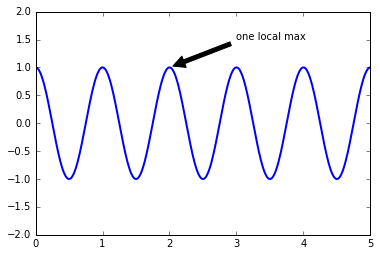

In [13]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('one local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

A more advanced example (http://matplotlib.org/examples/pylab_examples/annotation_demo.html#pylab-examples-annotation-demo)

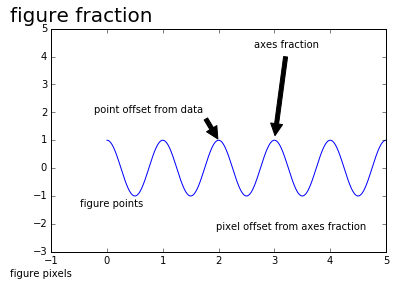

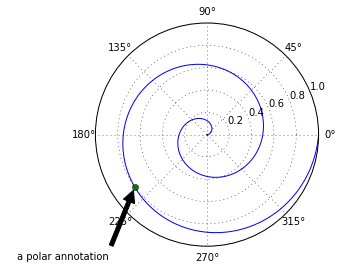

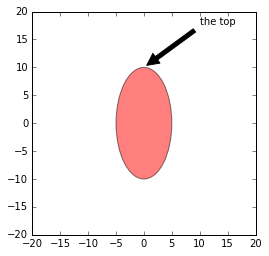

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


# If only one location is given, the text and xypoint being
# annotated are assumed to be the same
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-3, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s)

ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')

ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# use negative points or pixels to specify from right, top -10, 10
# is 10 points to the left of the right side of the axes and 10
# points above the bottom
ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')


# You can specify the xypoint and the xytext in different positions and
# coordinate systems, and optionally turn on a connecting line and mark
# the point with a marker.  Annotations work on polar axes too.
# In the example below, the xy point is in native coordinates (xycoords
# defaults to 'data').  For a polar axes, this is in (theta, radius) space.
# The text in the example is placed in the fractional figure coordinate system.
# Text keyword args like horizontal and vertical alignment are respected.
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')


# You can also use polar notation on a cartesian axes.  Here the native
# coordinate system ('data') is cartesian, so you need to specify the
# xycoords and textcoords as 'polar' if you want to use (theta, radius).

el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])

plt.show()

## Logarithmic & Other Nonlinear Axis

`matplotlib.pyplot` supported not only linear axis scales, but also logarithmic and logit scales. **This is commonly used if data spans many orders of magnitude**. Changing the scale of an axis is easy:

```python
plot.xscale('log')
```

An example of four plots with the same data and different scales for the `y` axis is shown below

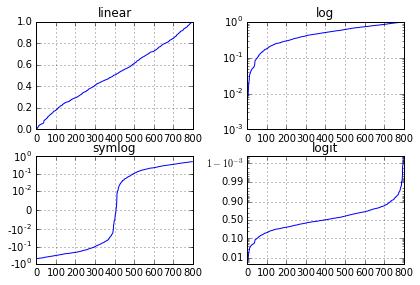

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

It's also possible to create customized scales. More info can be found [here](http://matplotlib.org/devel/add_new_projection.html#adding-new-scales).